# Data Cleaning : Handling Missing Values and Outlier Analyses 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Using “landslide_data3_miss.csv” file that contains 
some missing values and “landslide_data3_original.csv”  the original file without 
any missing values

In [2]:
df = pd.read_csv("landslide_data3_miss.csv")
df.head()

,dates,stationid,temperature,humidity,pressure,rain,lightavgw/o0,lightmax,moisture
0,08-07-2018,t10,25.46875,82.18750,1036.346875,6.75,5.5000,4000.0,0.0000
1,09-07-2018,t10,26.19298,83.14912,1037.604386,1761.75,11.8448,4000.0,5.6930
2,10-07-2018,t10,25.17021,85.34043,1037.889362,652.50,8.7692,4000.0,NaN
3,11-07-2018,t10,NaN,87.68657,1036.857463,963.00,8.8358,4000.0,6.0373
4,12-07-2018,t10,24.06923,87.64615,1027.830769,254.25,274.6232,4333.0,31.2385


Plotting a graph of the attribute names (x-axis) with the number of missing values

In [4]:
attributes = list(df.columns)
values = []
missing = df.isnull().sum(axis = 0)
missing_df = pd.DataFrame(missing)
for i in attributes:
    print("No. of missing values in",i,"is",missing_df.loc[i,0])
    values.append(missing_df.loc[i,0])

No. of missing values in dates is 0
No. of missing values in stationid is 19
No. of missing values in temperature is 66
No. of missing values in humidity is 45
No. of missing values in pressure is 77
No. of missing values in rain is 38
No. of missing values in lightavgw/o0 is 47
No. of missing values in lightmax is 31
No. of missing values in moisture is 31


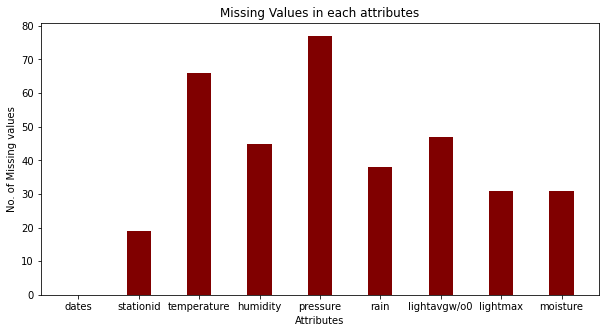

In [5]:
fig = plt.figure(figsize = (10, 5))
plt.bar(attributes,values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Attributes")
plt.ylabel("No. of Missing values")
plt.title("Missing Values in each attributes")
plt.show()

With target attribute “stationid”, the total number of tuples deleted having missing value in the target 
attribute :-

In [14]:
df1 = df.copy()
has_nan = df1['stationid'].isnull()
stationid_nan =  dict(df1['stationid'].loc[has_nan])
row_has_nan = list(stationid_nan.keys())
print("Row number of deleted tuples :",*row_has_nan)
print("Total numbers of tuples deleted :",len(row_has_nan))
df1 = df1.drop(row_has_nan)

Row number of deleted tuples : 10 14 170 174 215 259 266 283 338 383 408 414 415 416 462 731 733 737 741
Total numbers of tuples deleted : 19


Deleting the tuples(rows) having equal to or more than one third of attributes with missing values:-

In [32]:
df2 = df.copy()
dict_has_nan = dict(df2.isnull().sum(axis=1))
indx = list(dict_has_nan.keys())
no_nan = list(dict_has_nan.values())
count = 0
nan_rows = []
for i in indx:
    if no_nan[i]>=3: 
        nan_rows.append(i)
        count +=1
print("Total number of tuples to be deleted :",count)
#print(nan_rows)
df2 = df2.drop(nan_rows)
print("No. of rows in original data :",len(df.index))
print("No. of rows remaining after dropping the tuples :",len(df2.index))

Total number of tuples to be deleted : 39
No. of rows in original data : 945
No. of rows remaining after dropping the tuples : 906


In [18]:
for i in attributes:
    print("No. of missing values remaing in",i,'is',df2[i].isnull().sum())

No. of missing values remaing in dates is 0
No. of missing values remaing in stationid is 15
No. of missing values remaing in temperature is 34
No. of missing values remaing in humidity is 13
No. of missing values remaing in pressure is 41
No. of missing values remaing in rain is 7
No. of missing values remaing in lightavgw/o0 is 15
No. of missing values remaing in lightmax is 1
No. of missing values remaing in moisture is 6


Handling the Missing values

Replacing the missing values by mean of their respective attribute

RMSE values for temperature is 0.71
RMSE values for humidity is 0.83
RMSE values for pressure is 4.50
RMSE values for rain is 915.36
RMSE values for lightavgw/o0 is 263.46
RMSE values for lightmax is 310.94
RMSE values for moisture is 3.01


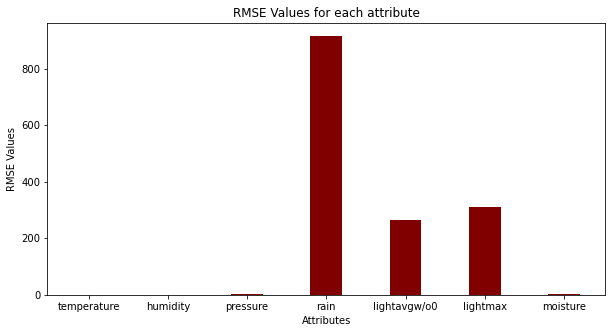

In [37]:
df3 = df2.copy()
attributes_new = ['temperature', 'humidity', 'pressure', 'rain', 'lightavgw/o0', 'lightmax', 'moisture']
for i in attributes_new: 
    mean_attr = df2[i].mean()
    df3[i] = df3[i].fillna(mean_attr)

df_original = pd.read_csv("landslide_data3_original.csv")

RMSE_value = []

for i in attributes_new:
    RMSE_value.append(((df_original[i] - df3[i]) ** 2).mean() ** .5)
    print("RMSE values for",i,"is %1.2f"%(((df_original[i] - df3[i]) ** 2).mean() ** .5))
    
fig = plt.figure(figsize = (10, 5))
plt.bar(attributes_new,RMSE_value, color ='maroon',
        width = 0.4)
 
plt.xlabel("Attributes")
plt.ylabel("RMSE Values")
plt.title("RMSE Values for each attribute")
plt.show()


Replace the missing values in each attribute using linear interpolation technique

RMSE values for temperature is 0.71
RMSE values for humidity is 0.83
RMSE values for pressure is 4.50
RMSE values for rain is 915.36
RMSE values for lightavgw/o0 is 263.46
RMSE values for lightmax is 310.94
RMSE values for moisture is 3.01


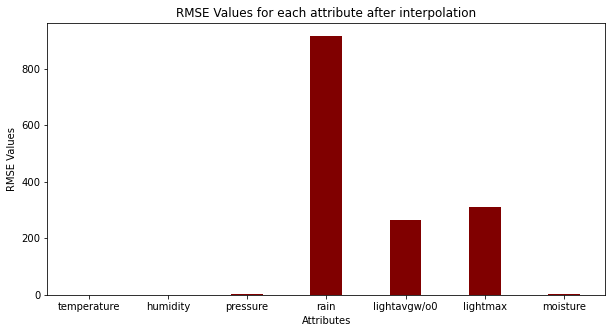

In [38]:
df4 = df2.copy()
for i in attributes_new:
    df4[i] = df4[i].interpolate(method ='linear')

RMSE_inter = []
for i in attributes_new:
    RMSE_inter.append(((df_original[i] - df4[i]) ** 2).mean() ** .5)
    print("RMSE values for",i,"is %1.2f"%(((df_original[i] - df4[i]) ** 2).mean() ** .5))
    
fig = plt.figure(figsize = (10, 5))
plt.bar(attributes_new,RMSE_inter, color ='maroon',
        width = 0.4)
 
plt.xlabel("Attributes")
plt.ylabel("RMSE Values")
plt.title("RMSE Values for each attribute after interpolation")
plt.show()

Outlier detection

Boxplot of Rain and Temperature attribute

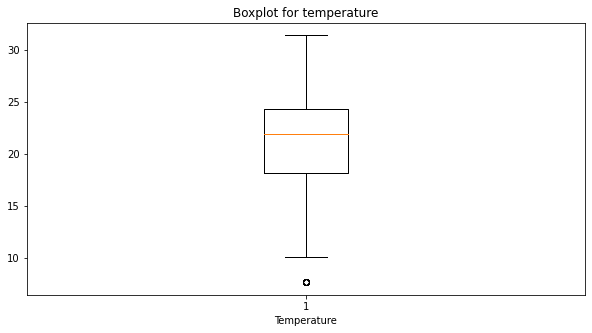

[]

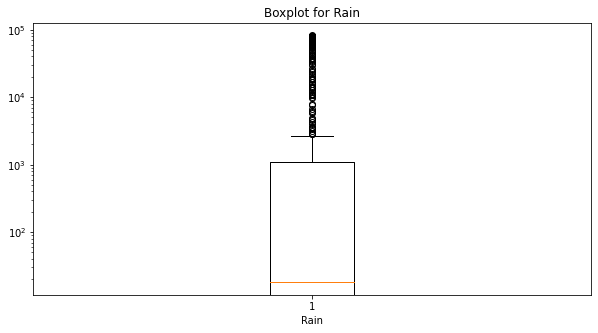

In [39]:
fig = plt.figure(figsize =(10, 5))
plt.title("Boxplot for temperature")
plt.boxplot(df4['temperature'])
plt.xlabel("Temperature")
plt.show()


fig = plt.figure(figsize =(10, 5))
plt.title("Boxplot for Rain")
plt.boxplot(df4['rain'])
plt.xlabel("Rain")
plt.semilogy()

List of outliers in Temperature and Rain attribute

In [42]:
def outliers(x):  #Function for outliers
    minimum=2.5*np.percentile(df4[x],25)-1.5*np.percentile(df4[x],75) #conditions for outliers
    maximum=2.5*np.percentile(df4[x],75)-1.5*np.percentile(df4[x],25)
    outliers_=pd.concat((df4[x][df4[x]< minimum],df4[x][df4[x]> maximum]))
    return outliers_

rain_out = list(outliers('rain').index)
temp_out = list(outliers('temperature').index)
print("Row no. of outliers in rain : ",*rain_out)
print("\nRow no. of outliers in Temperatures : ",*temp_out)

Row no. of outliers in rain :  12 14 16 27 58 135 144 168 199 200 201 206 322 323 324 630 631 632 636 637 638 693 694 696 697 699 702 704 705 711 741 742 743 744 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 772 773 774 775 776 777 778 779 780 781 782 783 785 789 790 791 792 793 794 795 796 798 799 800 801 802 803 825 826 827 828 829 831 835 836 840 841 842 843 846 847 851 853 854 855 856 857 858 859 862 863 864 865 866 867 868 870 871 872 873 874 875 876 877 878 879 883 884 885 886 887 888 889 890 891 892 893 894 895 896 897 898 899 900 901 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916 917 918 919 920 923 924 925 926 927 928 929 930 931 933 934 935 936 937 938 939 940 941 942 943 944

Row no. of outliers in Temperatures :  509 510 511 512 513 514 515 516 517 518


Boxplot after replacing outliers



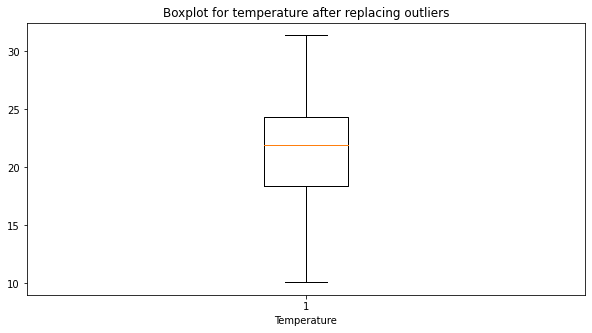

[]

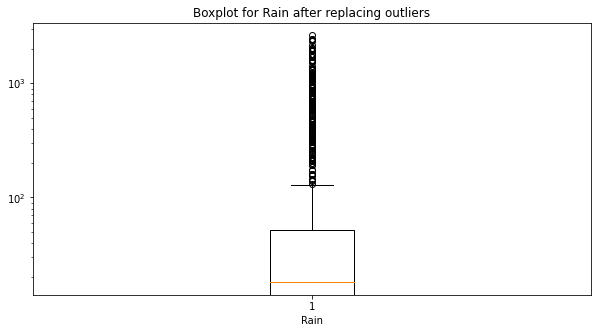

In [43]:
df4['rain'].replace(df4['rain'][rain_out],df4['rain'].median(),inplace=True)
df4['temperature'].replace(df4['temperature'][temp_out],df4['temperature'].median(),inplace=True)

print("Boxplot after replacing outliers\n")
fig = plt.figure(figsize =(10, 5))
plt.title("Boxplot for temperature after replacing outliers")
plt.boxplot(df4['temperature'])
plt.xlabel("Temperature")
plt.show()


fig = plt.figure(figsize =(10, 5))
plt.title("Boxplot for Rain after replacing outliers")
plt.boxplot(df4['rain'])
plt.xlabel("Rain")
plt.semilogy()